# Problem Statement

This is a practical assignment provided by the Mobile Financial Solutions. Its a dataset containing different variables

**Questions**

1. Find if there is any relation between "features" and Outputs.
2. Can you identify model for the relation between input and output?
3. Explain the approach used to solve the problem.
4. Explain the programming languages and frameworks used and why?

I have chosen to use python Jupyter notebooks to both relay my code plus output. steps involved will be to observe, clean and analyse the data and answer the answers above.

# Import packages

In [356]:
##for faster data processing
import numba as nb

#for data manipulation 
import pandas as pd
import numpy as np

##for data visualizations and distributions of the variables
import matplotlib as mtb
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
import scipy as sc
import sklearn as skl

# Import dataset

In [357]:
#read the data file
mfs_df = pd.read_csv('../mfs_assignment_data/Practical_Assignment_Data_Scientists1.csv', sep=',')

In [358]:
#mfs_df = mfs_df[mfs_df['Feature 2']!= "179,769,313,486,231,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000.00"]

# EDA (exploratory data analysis)

In [359]:
#display the data 
mfs_df.head()

,Date,From,To,Feature 1,Feature 2,Feature 3,Ouput1,Output 2
0,05/22/2018,6:20:12,6:23:00,3.260000e+09,294000000.0,9.700000e+10,500,3
1,05/22/2018,6:23:12,6:26:00,4.410000e+09,251000000.0,1.430000e+11,500,3
2,05/22/2018,6:26:12,6:29:00,7.090000e+09,194000000.0,1.780000e+11,500,3
3,05/22/2018,6:29:12,6:32:00,4.720000e+09,219000000.0,1.610000e+11,500,3
4,05/22/2018,6:32:12,6:35:00,6.560000e+09,218000000.0,1.880000e+11,500,3


In [360]:
#check the class of each dataset
mfs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 8 columns):
Date         707 non-null object
From         707 non-null object
To           707 non-null object
Feature 1    707 non-null float64
Feature 2    707 non-null float64
Feature 3    707 non-null float64
Ouput1       707 non-null int64
Output 2     707 non-null int64
dtypes: float64(3), int64(2), object(3)
memory usage: 44.3+ KB


In [361]:
# show the summary of each dataset
mfs_df.describe()

,Feature 1,Feature 2,Feature 3,Ouput1,Output 2
count,7.070000e+02,7.070000e+02,7.070000e+02,707.000000,707.000000
mean,5.369079e+09,1.133999e+08,1.280988e+11,370.226308,4.376238
std,3.631373e+09,9.033315e+07,8.167410e+10,114.950191,5.217632
min,1.380000e+08,5.019605e+06,5.160000e+08,200.000000,2.000000
25%,3.650000e+09,4.660000e+07,7.945000e+10,280.000000,2.000000
50%,4.970000e+09,1.010000e+08,1.240000e+11,400.000000,3.000000
75%,6.695000e+09,1.610000e+08,1.735000e+11,450.000000,4.000000
max,6.190000e+10,8.930000e+08,8.620000e+11,600.000000,30.000000


In [362]:
mfs_df.iloc[690:]

,Date,From,To,Feature 1,Feature 2,Feature 3,Ouput1,Output 2
690,05/25/2018,10:18:24,10:20:24,5.190000e+09,112000000.0,1.840000e+11,600,2
691,05/25/2018,10:20:24,10:22:10,6.580000e+09,154000000.0,1.910000e+11,600,2
692,05/25/2018,10:22:24,10:24:10,5.500000e+09,92200000.0,1.520000e+11,600,2
693,05/25/2018,10:24:22,10:27:10,6.130000e+09,36500000.0,1.980000e+11,520,3
694,05/25/2018,10:27:22,10:30:10,5.620000e+09,52900000.0,1.820000e+11,520,3
695,05/25/2018,10:30:22,10:33:10,5.730000e+09,44800000.0,1.740000e+11,520,3
696,05/25/2018,10:33:22,10:36:10,5.310000e+09,45100000.0,1.650000e+11,520,3
697,05/25/2018,10:36:22,10:39:10,7.370000e+09,37900000.0,1.980000e+11,520,3
698,05/25/2018,10:39:21,10:42:10,6.350000e+09,35700000.0,1.710000e+11,450,3
699,05/25/2018,10:42:21,10:45:10,4.920000e+09,29200000.0,1.530000e+11,450,3


In [363]:
#check number of rows and columns
mfs_df.shape

(707, 8)

In [364]:
#check the data types
mfs_df.dtypes

Date          object
From          object
To            object
Feature 1    float64
Feature 2    float64
Feature 3    float64
Ouput1         int64
Output 2       int64
dtype: object

In [365]:
mfs_df.columns

Index(['Date', 'From', 'To', 'Feature 1', 'Feature 2', 'Feature 3', 'Ouput1',
       'Output 2'],
      dtype='object')

# Data Prep

## Rename columns

In [366]:
# Rename columns using a dictionary to map values

mfs_df.rename(columns={'Feature 1':'feature_1', 'Feature 2':'feature_2', 'Feature 3':'feature_3',
                       'Ouput1':'output_1', 'Output 2':'output_2'}, inplace=True)

## change dtypes

In [367]:
mfs_df['feature_1']=mfs_df['feature_1'].astype('int64',inplace=True)
mfs_df['feature_2']=mfs_df['feature_2'].astype('int64',inplace=True)
mfs_df['feature_3']=mfs_df['feature_3'].astype('int64',inplace=True)

In [368]:
# Convert date to pandas date_time
mfs_df["From"] = mfs_df["From"].apply(pd.to_datetime, errors='coerce')
mfs_df["To"] = mfs_df["To"].apply(pd.to_datetime, errors='coerce')
mfs_df['Date'] = mfs_df['Date'].apply(pd.to_datetime, errors='coerce')

In [369]:
mfs_df.describe()

,feature_1,feature_2,feature_3,output_1,output_2
count,7.070000e+02,7.070000e+02,7.070000e+02,707.000000,707.000000
mean,5.369079e+09,1.133999e+08,1.280988e+11,370.226308,4.376238
std,3.631373e+09,9.033315e+07,8.167410e+10,114.950191,5.217632
min,1.380000e+08,5.019604e+06,5.160000e+08,200.000000,2.000000
25%,3.650000e+09,4.660000e+07,7.945000e+10,280.000000,2.000000
50%,4.970000e+09,1.010000e+08,1.240000e+11,400.000000,3.000000
75%,6.695000e+09,1.610000e+08,1.735000e+11,450.000000,4.000000
max,6.190000e+10,8.930000e+08,8.620000e+11,600.000000,30.000000


## Check for Nan

In [370]:
mfs_df.isnull().values.any()

False

In [371]:
mfs_df.columns.values

array(['Date', 'From', 'To', 'feature_1', 'feature_2', 'feature_3',
       'output_1', 'output_2'], dtype=object)

## separate Categorical and numerical variables

In [372]:
categorical_features = ['Date','From','To']
numerical_features = ['feature_1','feature_2','feature_3','output_1','output_2'] 

## Measures of central tendancy

In [373]:
mfs_df[numerical_features].mean()

feature_1    5.369079e+09
feature_2    1.133999e+08
feature_3    1.280988e+11
output_1     3.702263e+02
output_2     4.376238e+00
dtype: float64

In [374]:
mfs_df[numerical_features].median()

feature_1    4.970000e+09
feature_2    1.010000e+08
feature_3    1.240000e+11
output_1     4.000000e+02
output_2     3.000000e+00
dtype: float64

In [375]:
mfs_df[numerical_features].cumsum().tail()

,feature_1,feature_2,feature_3,output_1,output_2
702,3779569000000,79998020919,90125786000000,260370,3082
703,3783619000000,80041520919,90224986000000,260730,3085
704,3787769000000,80085420919,90347986000000,261090,3088
705,3792379000000,80136820919,90465986000000,261450,3091
706,3795939000000,80173720919,90565886000000,261750,3094


In [376]:
mfs_df['feature_2'].dtype

dtype('int64')

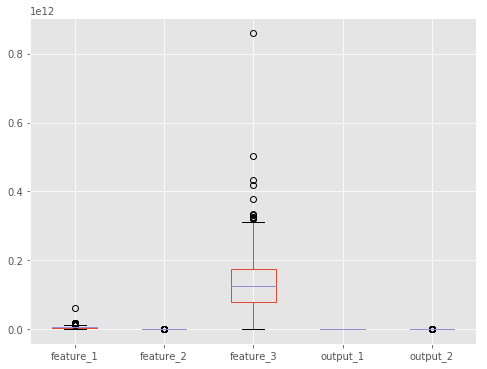

In [377]:
mfs_df.boxplot(figsize=(8,6))

# Mfs practical questions

## Find if there is any relation between "features" and Outputs

Relations are correspondences between sets of values. The first value of a relation is an input value and the second value is the output value. The input is the independent value, and the output value is the dependent value. In this case I decided to use correlation to check if there was any relation between the features and the outputs.

In [378]:
mfs_df.corr()

,feature_1,feature_2,feature_3,output_1,output_2
feature_1,1.000000,0.240527,0.707022,0.254550,-0.092633
feature_2,0.240527,1.000000,0.462291,0.515097,-0.281395
feature_3,0.707022,0.462291,1.000000,0.536483,-0.220468
output_1,0.254550,0.515097,0.536483,1.000000,-0.407689
output_2,-0.092633,-0.281395,-0.220468,-0.407689,1.000000


**conclusion**

1. We can see that feature 1 and Output 1 have a weak positive relation of ~26% 
2. feature 2 and Output 1 have a fair positive realation of ~52% 
3. feature 3 and Output 1 have a strong positive relation of ~53.6% 


1. We can see that feature 1 and Output 2 have a weak negative relation of ~-9.3% 
2. feature 2 and Output 2 have a strong negative realation of ~-28.1% 
3. feature 3 and Output 2 have a strong negative relation of ~22% 

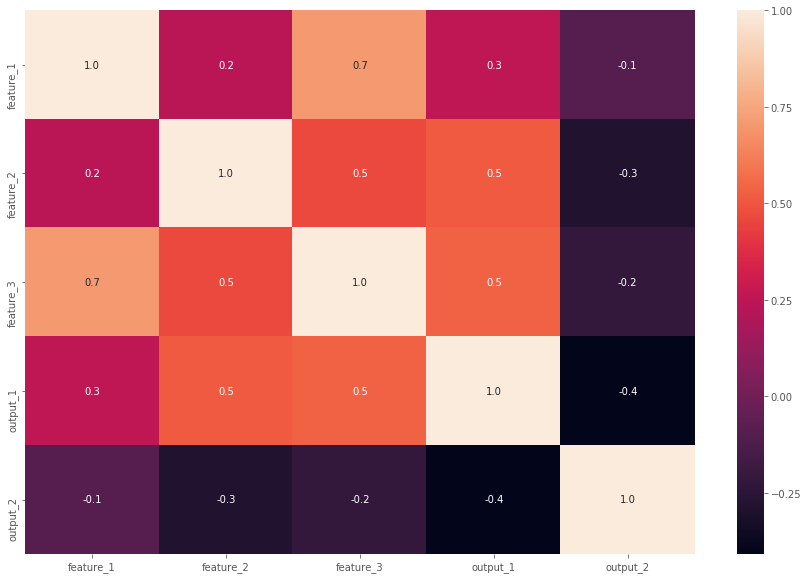

In [379]:
#check the relationship between feautures and outputs using the heatmap(correlation) 
mfs_df.corr()
# Plot correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(mfs_df[numerical_features].corr(), annot=True, fmt=".1f")
plt.show()

#when it tends to 1, it shows it has a relation, and as it tends to -1, it shows a weak relation.

Check association between output 2 and the timelines


In [380]:
#specify columns required and create a new dataframe with those columns
columns= ['Date', 'From', 'To', 'output_2']
mfs_df1 = mfs_df[columns]

In [381]:
mfs_df1.corr()

,output_2
output_2,1.0


Conclusion: This shows output2 has no correlation with the the timelines

Net step is to ceate a new column to the first dataframe showing the difference between  column To and column From

In [382]:
mfs_df['time_delta']=mfs_df['To']-mfs_df['From']

In [383]:
mfs_df.head()

,Date,From,To,feature_1,feature_2,feature_3,output_1,output_2,time_delta
0,2018-05-22,2019-07-19 06:20:12,2019-07-19 06:23:00,3260000000,294000000,97000000000,500,3,00:02:48
1,2018-05-22,2019-07-19 06:23:12,2019-07-19 06:26:00,4410000000,251000000,143000000000,500,3,00:02:48
2,2018-05-22,2019-07-19 06:26:12,2019-07-19 06:29:00,7090000000,194000000,178000000000,500,3,00:02:48
3,2018-05-22,2019-07-19 06:29:12,2019-07-19 06:32:00,4720000000,219000000,161000000000,500,3,00:02:48
4,2018-05-22,2019-07-19 06:32:12,2019-07-19 06:35:00,6560000000,218000000,188000000000,500,3,00:02:48


In [384]:
mfs_df['time_delta'].mode()

0   00:03:54
dtype: timedelta64[ns]

In [385]:
mfs_df['time_delta'].mean()

Timedelta('0 days 00:03:18.111739')

**Concusion**

I observed there is mainly a difference of 3 minutes 45 seconds looking at the time delta mode and average of approximately 3 minutes 18 seconds.

Use the time_delta column to create new columns to different time intervals such as hours, days and months

In [386]:
import calendar

#add columns for the timeline range for hours and minutes
mfs_df['hour'] = pd.DatetimeIndex(mfs_df['time_delta']).hour

mfs_df.head()

,Date,From,To,feature_1,feature_2,feature_3,output_1,output_2,time_delta,hour
0,2018-05-22,2019-07-19 06:20:12,2019-07-19 06:23:00,3260000000,294000000,97000000000,500,3,00:02:48,0
1,2018-05-22,2019-07-19 06:23:12,2019-07-19 06:26:00,4410000000,251000000,143000000000,500,3,00:02:48,0
2,2018-05-22,2019-07-19 06:26:12,2019-07-19 06:29:00,7090000000,194000000,178000000000,500,3,00:02:48,0
3,2018-05-22,2019-07-19 06:29:12,2019-07-19 06:32:00,4720000000,219000000,161000000000,500,3,00:02:48,0
4,2018-05-22,2019-07-19 06:32:12,2019-07-19 06:35:00,6560000000,218000000,188000000000,500,3,00:02:48,0


In [388]:
mfs_df['Date'] = pd.to_datetime(mfs_df['Date'])
tmp2_df =mfs_df
tmp2_df = tmp2_df.reset_index()
tmp2_df = tmp2_df.groupby(
    tmp2_df['Date'].dt.strftime('%Y-%m-%d'))['index'].count().reset_index()
tmp2_df
tmp2_df.columns = ['Date', 'output1']
tmp2_df[['Date', 'output1']].to_csv("tmp2_df.csv", sep="|")

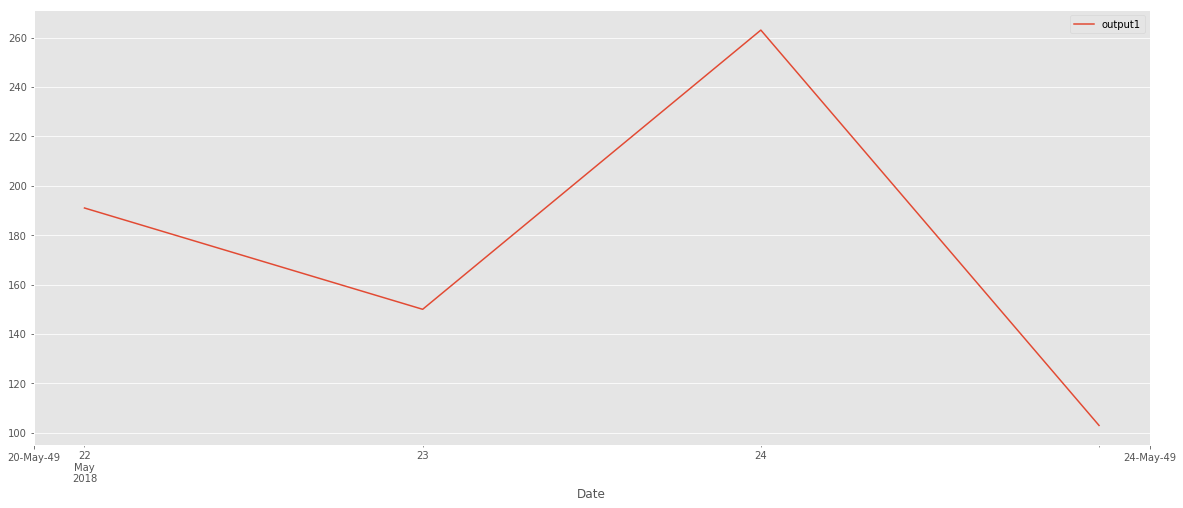

In [389]:
import matplotlib.dates as mdates
%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

#read data from csv
tmp2_df = pd.read_csv('tmp2_df.csv', usecols=['Date', 'output1'], parse_dates=['Date'], sep="|")

#set date as index
tmp2_df.set_index('Date', inplace=True)

#plot data
fig, ax = plt.subplots(figsize=(20,8))
#ax.bar(tmp2_df.index, tmp2_df['name'])
tmp2_df.plot(ax=ax)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=2))

#format date
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))


In [390]:
mfs_df.corr()

,feature_1,feature_2,feature_3,output_1,output_2,hour
feature_1,1.000000,0.240527,0.707022,0.254550,-0.092633,NaN
feature_2,0.240527,1.000000,0.462291,0.515097,-0.281395,NaN
feature_3,0.707022,0.462291,1.000000,0.536483,-0.220468,NaN
output_1,0.254550,0.515097,0.536483,1.000000,-0.407689,NaN
output_2,-0.092633,-0.281395,-0.220468,-0.407689,1.000000,NaN
hour,NaN,NaN,NaN,NaN,NaN,NaN


**observation**
correlation of hour column was Nan because it was all zero

In [391]:
mfs_df.columns.values

array(['Date', 'From', 'To', 'feature_1', 'feature_2', 'feature_3',
       'output_1', 'output_2', 'time_delta', 'hour'], dtype=object)

## Can you identify model for the relation between input and output?


Linear Regression Model.- where the input(x) variable predicts the outcome value of the Output(Y) variable. 
In our case we have 2 dependant variables (output1 and output2) and 3 independent variables(feature1, feature2 and feature3)

In this case we have seen that output 2 is negatively correlated to the features and has no correllation with the timelines so I chose to use Output 1 to build the model.

In [392]:
#Import necessary packages for the model
import numpy as np 
import sklearn as skl
from sklearn.linear_model import LinearRegression

X = mfs_df[['feature_1', 'feature_2', 'feature_3']] #put all the independendent variables under one name
y = mfs_df['output_1'] ##dependent variable



Split the dataset to a train and test datasets to fit the model


In [401]:
from sklearn.model_selection import train_test_split #to split to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(424, 3) (424,)
(283, 3) (283,)


In [402]:
X_train.keys()

Index(['feature_1', 'feature_2', 'feature_3'], dtype='object')

In [404]:
import statsmodels.api as sm ## for statistical models inclusive of regression

model = sm.OLS(y_train, X_train).fit()

predictions = model.predict(X_test)
expected = y_test

In [405]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               output_1   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     819.9
Date:                Fri, 19 Jul 2019   Prob (F-statistic):          2.31e-175
Time:                        12:39:47   Log-Likelihood:                -2717.7
No. Observations:                 424   AIC:                             5441.
Df Residuals:                     421   BIC:                             5454.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
feature_1   1.606e-08    2.7e-09      5.959      0.000    1.08e-08    2.14e-08
feature_2   6.706e-07   8.41e-08      7.974      0.000    5.05e-07    8.36e-07
feature_3   1.189e-09    1.3e-10      9.146      0.000    9.34e-10    1.44e-09
==============================================================================
Omnibus:                       16.649   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.065
Skew:                          -0.317   Prob(JB):                     5.95e-06
Kurtosis:                       3.980   Cond. No.                     1.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**conclusion**
The intercept β^0=4.16

The slope β^1=6.71

The slope β^2=	1.19

The positive β^1 parameter estimate implies that there feature2 has a positive effect on the outcome

The p-value of 0.000 for β^1 implies that the input and the output features are statistically significant (using p < 0.05 as a rejection rule)

### fit the linear regression model using scikit-learn

In [408]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [409]:
# Make predictions using the testing set
y_pred = lr_model.predict(X_test)

In [410]:
lr_model.score(X_train,y_train)

0.4064273721365029

**Conclusion**
I have observed that the accuracy level is low mainly due to a strong multi colinearity between some features

## Explain the approach used to solve the problem.

1. The first step was to import the package numpy for numerical functions and class LinearRegression from skilearn. this are needed to show how inputs affect the result/output

e.g.
import numpy as np
from sklearn.linear_model import LinearRegression
 
2. I provided the data with the features being the regressors(x) and output being (y) and split the dataset to have training and testing datasets

3. Next step was to fit an Ordinary least square (OLS) to check for multi colinearity which was indicated to be strong. This indicates that the model accuracy will be low.
Multi colinearity occurs when independent variables in a regression model are correlated.  this shows that they are co-dependant of each other meaning when one idependet variable changes the other independent variable changes as well.

4. I then created a linear regression model and fit it using the provided data. 
e.g. model = LinearRegression() 
then fit the model i.e. model.fit(x, y) 

 model= LinearRegression.fit(x, y)
5. after fitting the model, I the accracy results of the model  for interpretaion.

6. Once I have checked the models accuracy, I can use it to make good valid predictions with the existing data or new data.


## Explain the programming languages and frameworks used and why?

I used Python programming language on a jupyter notebook(an open source platform where I can share live code, visualizations and interestingly write code and see its output below it). the frameworks used were numpy for numerical operations, pandas for data manipulation, skilearn and scipy to show data distributions, regression models and Visualizations and lastly use of statmodels for the colinearlity and output relation to the inputs and to fit the model.
